In [4]:
# Cell 1: Import Libraries
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
import IPython.display as ipd
from ipywidgets import interact, Button, Output, VBox, HBox
import threading
import queue
import time

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


In [7]:
# Cell 2: Check Available Audio Devices

import sounddevice as sd

def show_audio_devices():
    devices = sd.query_devices()
    default_device = sd.default.device  # a tuple (input_index, output_index)
    
    print("Available audio devices:")
    for i, dev in enumerate(devices):
        print(f"{i}: {dev['name']}  (inputs: {dev['max_input_channels']}, outputs: {dev['max_output_channels']})")
    
    print(f"\nDefault Input Device:  {default_device[0]}")
    print(f"Default Output Device: {default_device}")  # use index 1 instead of 39

show_audio_devices()


Available audio devices:
0: Microsoft Sound Mapper - Input  (inputs: 2, outputs: 0)
1: Microphone Array (Intel® Smart   (inputs: 4, outputs: 0)
2: Microsoft Sound Mapper - Output  (inputs: 0, outputs: 2)
3: Speakers (Realtek(R) Audio)  (inputs: 0, outputs: 2)
4: Primary Sound Capture Driver  (inputs: 2, outputs: 0)
5: Microphone Array (Intel® Smart Sound Technology for Digital Microphones)  (inputs: 4, outputs: 0)
6: Primary Sound Driver  (inputs: 0, outputs: 2)
7: Speakers (Realtek(R) Audio)  (inputs: 0, outputs: 2)
8: Speakers (Realtek(R) Audio)  (inputs: 0, outputs: 2)
9: Microphone Array (Intel® Smart Sound Technology for Digital Microphones)  (inputs: 2, outputs: 0)
10: Microphone (Realtek HD Audio Mic input)  (inputs: 2, outputs: 0)
11: Headphones 1 (Realtek HD Audio 2nd output with SST)  (inputs: 0, outputs: 2)
12: Headphones 2 (Realtek HD Audio 2nd output with SST)  (inputs: 0, outputs: 2)
13: PC Speaker (Realtek HD Audio 2nd output with SST)  (inputs: 2, outputs: 0)
14: Stereo

🎤 Recording for 3 seconds...
✅ Recording completed!
🔊 Playing back recording...


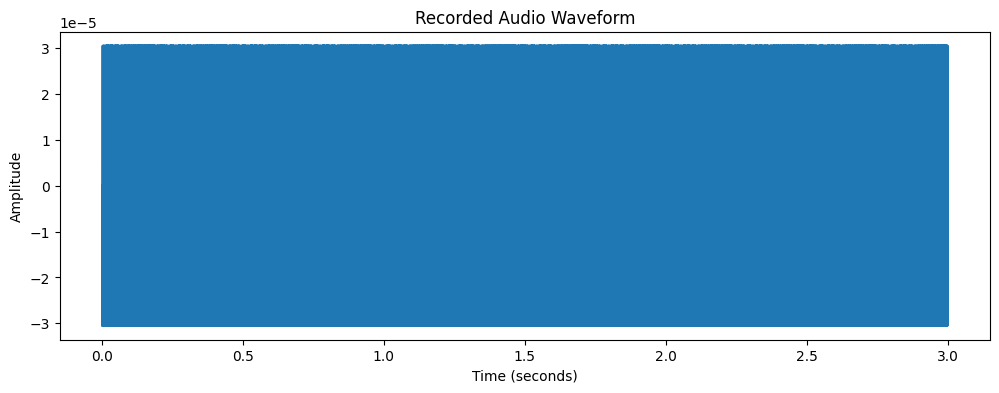

In [8]:
# Cell 3: Test Microphone Recording
class AudioRecorder:
    def __init__(self, sample_rate=16000, channels=1):
        self.sample_rate = sample_rate
        self.channels = channels
        self.recording = False
        self.audio_data = []
        
    def record_audio(self, duration=3):
        """Record audio for specified duration"""
        print(f"🎤 Recording for {duration} seconds...")
        
        try:
            # Record audio
            audio_data = sd.rec(
                int(duration * self.sample_rate), 
                samplerate=self.sample_rate, 
                channels=self.channels,
                dtype=np.float32
            )
            sd.wait()  # Wait until recording is finished
            
            print("✅ Recording completed!")
            return audio_data.flatten()
            
        except Exception as e:
            print(f"❌ Recording failed: {e}")
            print("💡 Make sure Terminal has microphone permissions!")
            return None

# Test recording
recorder = AudioRecorder()
test_audio = recorder.record_audio(duration=3)

if test_audio is not None:
    # Play back the recording
    print("🔊 Playing back recording...")
    sd.play(test_audio, recorder.sample_rate)
    sd.wait()
    
    # Visualize the waveform
    plt.figure(figsize=(12, 4))
    time_axis = np.linspace(0, len(test_audio)/recorder.sample_rate, len(test_audio))
    plt.plot(time_axis, test_audio)
    plt.title("Recorded Audio Waveform")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.show()
